# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg

In [1]:

# Your code here for Data Loading and Cleaning
import zipfile

zip_file_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Dataset.zip'
extract_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

KeyboardInterrupt: 

In [2]:
import os 
main_dataset_directory= 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray'
classes = os.listdir(os.path.join(main_dataset_directory , 'train'))

print("Contents of the main dataset directory")
print(os.listdir(main_dataset_directory)) 
print("\nContents of the train subdirectory :")
print(classes)
print("\nContents of the test subdirectory :")
print(os.listdir(os.path.join(main_dataset_directory , 'test')))

Contents of the main dataset directory
['chest_xray', 'test', 'train', 'val']

Contents of the train subdirectory :
['NORMAL', 'PNEUMONIA']

Contents of the test subdirectory :
['NORMAL', 'PNEUMONIA']


In [3]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [9]:
train_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\train\\'
test_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\test\\'
valid_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\val\\'


NORMAL_dir = os.path.join(train_path +classes[0]) 
PNEUMONIA_dir = os.path.join(train_path +classes[1]) 

pneumonia_names = os.listdir(PNEUMONIA_dir)
normal_names = os.listdir(NORMAL_dir)

print('There are ', len(pneumonia_names),
      'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')

There are  3875 images of pneumonia infected in training dataset
There are  1341 normal images in training dataset


In [5]:
def check_duplicate_image(path):
        image_filenames = [image.name for image in  path.glob('*.jpeg')]

        filename_counts = {}

        for filename in image_filenames:
            if filename in filename_counts:
                filename_counts[filename] += 1
            else:
                filename_counts[filename] = 1

        duplicate_filenames = [filename for filename, count in filename_counts.items() if count > 1]

        if duplicate_filenames:
            print("Duplicate image filenames:")
            for duplicate_filename in duplicate_filenames:
                print(duplicate_filename)
        else:
            print("No duplicate image filenames .")

In [6]:
import pathlib

norm_path = pathlib.Path(NORMAL_dir)
pneu_path = pathlib.Path(PNEUMONIA_dir)

In [7]:
print(check_duplicate_image(norm_path))
print(check_duplicate_image(pneu_path))

No duplicate image filenames .
None
No duplicate image filenames .
None


In [8]:
def check_for_corrupted_images(folder_path):
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path , img_name)
        try :
            img = Image.open(img_path)
        except :
            print("Corrupted Image Detected : {img_path}")
            os.remove(img_path)

In [9]:
for folder in [norm_path , pneu_path , test_normal , test_pneumonia] :
    check_for_corrupted_images(folder)

NameError: name 'test_normal' is not defined

## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


In [10]:
def plot_distribation_width_height(widths , heights ):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Widths')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.xlabel('Image Height')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Heights')

    plt.tight_layout()
    plt.show()

In [11]:
def plot_bytes_distrubation(image_sizes):
    plt.hist(image_sizes, bins=20, color='red', alpha=0.7)
    plt.xlabel('Image Size (Bytes)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Sizes (Bytes)')

In [12]:
train_data = [NORMAL_dir , PNEUMONIA_dir]

In [13]:
import os
from pathlib import Path
from PIL import Image
train_data = [norm_path , pneu_path]
train_widths = []
train_hieghts = []
train_Imgsize = []


for path in train_data:
    image_files = list(path.glob('**/*.jpeg'))

    widths = []
    heights = []
    image_sizes = []
    
    for image_file in image_files:
        size_bytes = os.path.getsize(image_file)
        image_sizes.append(size_bytes)
        with Image.open(image_file) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            

    train_widths.append(widths)
    train_hieghts.append(heights)
    train_Imgsize.append(image_sizes)

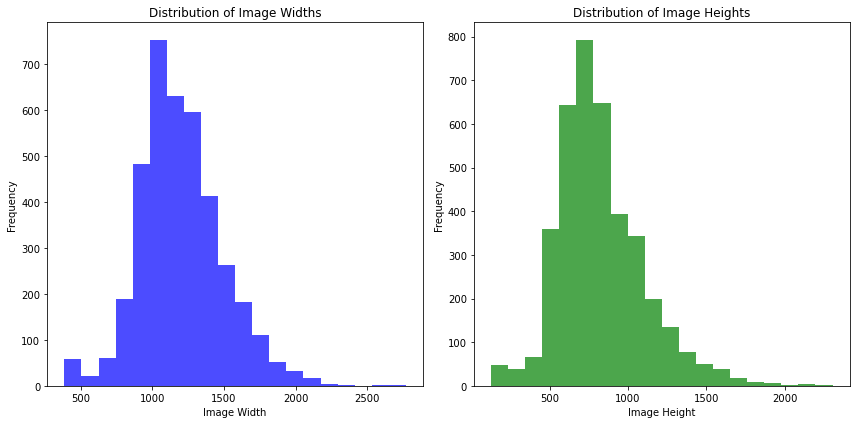

In [14]:
plot_distribation_width_height(train_widths[1] , train_hieghts[1]  )

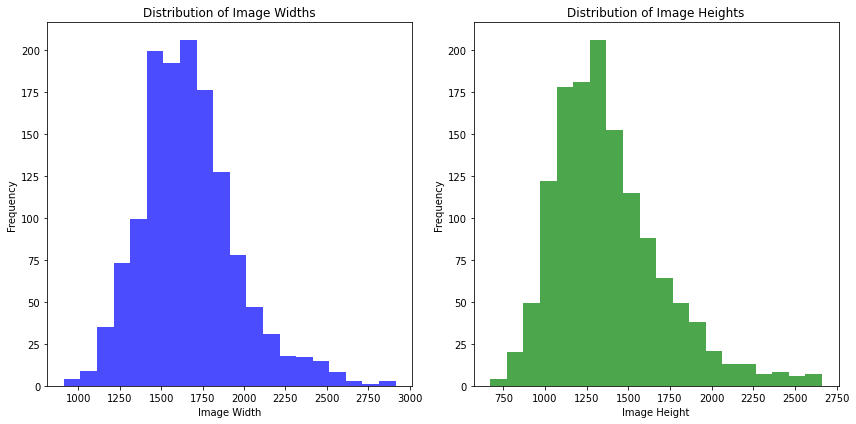

In [15]:
plot_distribation_width_height(train_widths[0] , train_hieghts[0])

In [16]:
train_widths = []
train_heights = []
train_Imgsize = []
label_name = []
image_paths = []  # Create a list to store the image file paths

for  path in train_data:
    image_files =  list(path.glob('**/*.jpeg'))
    for image_file in image_files:
        size_bytes = os.path.getsize(image_file)
        train_Imgsize.append(size_bytes)
        relative_path = os.path.relpath(image_file, path)
        image_paths.append(path.name + "/"+ relative_path) 
        with Image.open(image_file) as img:
            width, height = img.size
            train_widths.append(width)
            train_heights.append(height)
            label_name.append( path.name )

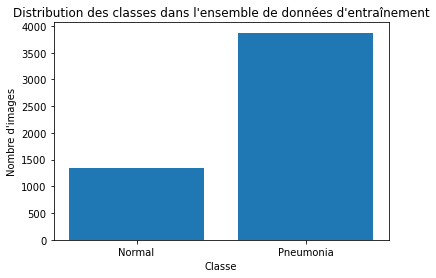

In [17]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Définir les chemins des répertoires
train_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\train\\'
test_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\test\\'
classes = ['NORMAL', 'PNEUMONIA']

# Créer une liste de chemins de répertoires
train_data = [Path(os.path.join(train_path, classes[0])), Path(os.path.join(train_path, classes[1]))]

# Compter le nombre d'images dans chaque classe
class_counts = [len(list(path.glob('**/*.jpeg'))) for path in train_data]

# Noms des classes
class_names = ['Normal', 'Pneumonia']

# Créer un graphique à barres pour visualiser la distribution
plt.bar(class_names, class_counts)
plt.xlabel('Classe')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des classes dans l\'ensemble de données d\'entraînement')
plt.show()


In [18]:
for  path in train_data:
    image_files =  list(path.glob('**/*.jpeg'))
    for image_file in image_files:
        size_bytes = os.path.getsize(image_file)
        train_Imgsize.append(size_bytes)
        relative_path = os.path.relpath(image_file, path)
        image_paths.append(path.name + "/"+ relative_path) 
        with Image.open(image_file) as img:
            width, height = img.size
            train_widths.append(width)
            train_heights.append(height)
            label_name.append( path.name )

In [19]:
import pandas as pd 
widths_df = pd.DataFrame({'Widths': train_widths})
heights_df = pd.DataFrame({'Heights': train_heights})
imgsize_df = pd.DataFrame({'ImgSize': train_Imgsize})
label_df = pd.DataFrame({'label': label_name})
imgpath_df = pd.DataFrame({'image_paths' :image_paths })
# if that's what you want.
df = pd.concat([widths_df, heights_df, imgsize_df , label_df , imgpath_df ], axis=1)

print(df.head())

   Widths  Heights  ImgSize   label               image_paths
0    2090     1858   870784  NORMAL  NORMAL/IM-0115-0001.jpeg
1    1422     1152   406305  NORMAL  NORMAL/IM-0117-0001.jpeg
2    1810     1434   582639  NORMAL  NORMAL/IM-0119-0001.jpeg
3    1618     1279   471556  NORMAL  NORMAL/IM-0122-0001.jpeg
4    1600     1125   451292  NORMAL  NORMAL/IM-0125-0001.jpeg


In [20]:
df['Aspect_Ratio'] =  round(widths_df['Widths'] / heights_df['Heights'] , 2 ) 
df

,Widths,Heights,ImgSize,label,image_paths,Aspect_Ratio
0,2090,1858,870784,NORMAL,NORMAL/IM-0115-0001.jpeg,1.12
1,1422,1152,406305,NORMAL,NORMAL/IM-0117-0001.jpeg,1.23
2,1810,1434,582639,NORMAL,NORMAL/IM-0119-0001.jpeg,1.26
3,1618,1279,471556,NORMAL,NORMAL/IM-0122-0001.jpeg,1.27
4,1600,1125,451292,NORMAL,NORMAL/IM-0125-0001.jpeg,1.42
...,...,...,...,...,...,...
10427,1414,882,103815,PNEUMONIA,PNEUMONIA/person99_virus_183.jpeg,1.60
10428,1256,696,73449,PNEUMONIA,PNEUMONIA/person9_bacteria_38.jpeg,1.80
10429,1152,856,76555,PNEUMONIA,PNEUMONIA/person9_bacteria_39.jpeg,1.35
10430,1248,728,70110,PNEUMONIA,PNEUMONIA/person9_bacteria_40.jpeg,1.71


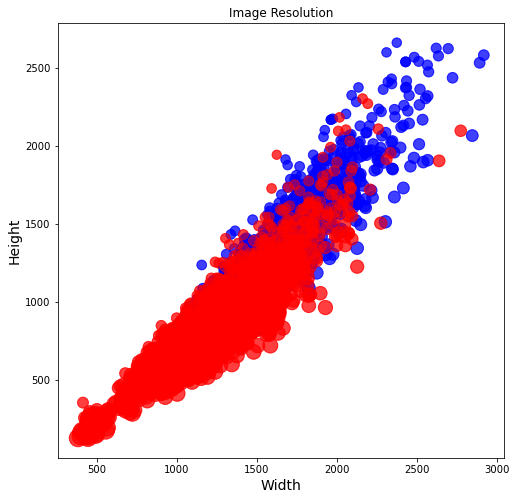

In [21]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Define colors based on the 'label' column (0 or 1)
colors = np.where(df['label'] == "NORMAL", 'blue', 'red')

points = ax.scatter(df.Widths, df.Heights, color=colors, alpha=0.5, s=df["Aspect_Ratio"] * 100, picker=True)

ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.show()

Text(0, 0.5, 'Count')

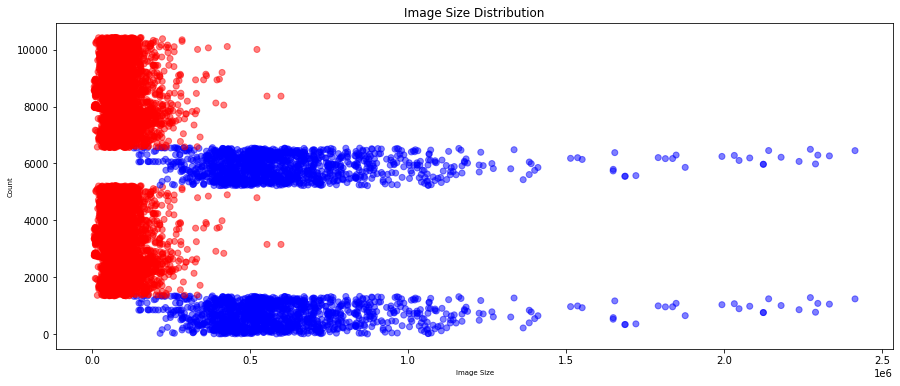

In [22]:
# Group by 'ImgSize' and count occurrences
size_counts = df.groupby('ImgSize').size().reset_index(name='Count')

# Scatter plot
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

# Define colors based on the 'label' column (0 or 1)
colors = np.where(df['label'] == "NORMAL", 'blue', 'red')

ax.scatter( df.ImgSize ,  df.index , color=colors, alpha=0.5)
ax.set_title("Image Size Distribution")
ax.set_xlabel("Image Size", size=7)
ax.set_ylabel("Count", size=7)

In [23]:
# Delete images bigger then 1M 2k
count = len(df[df["ImgSize"] >  1200000 ] )
print(count)

84


In [24]:
count = len(df[(df['label'] == "PNEUMONIA") & (df["ImgSize"] <  10000 )])
print(count)

82


In [25]:
import matplotlib.pyplot as plt

pneumonia_mean = df[df['label'] == 'PNEUMONIA'][['Widths', 'Heights']].mean()
pneumonia_std = df[df['label'] == 'PNEUMONIA'][['Widths', 'Heights']].std()

normal_mean = df[df['label'] == 'NORMAL'][['Widths', 'Heights']].mean()
normal_std = df[df['label'] == 'NORMAL'][['Widths', 'Heights']].std()

In [26]:
print( pneumonia_mean ,  pneumonia_std )

Widths     1200.483613
Heights     825.026839
dtype: float64 Widths     291.286879
Heights    277.055880
dtype: float64


In [27]:
print( normal_mean ,  normal_std ) 

Widths     1667.734526
Heights    1381.431022
dtype: float64 Widths     289.15657
Heights    326.25987
dtype: float64


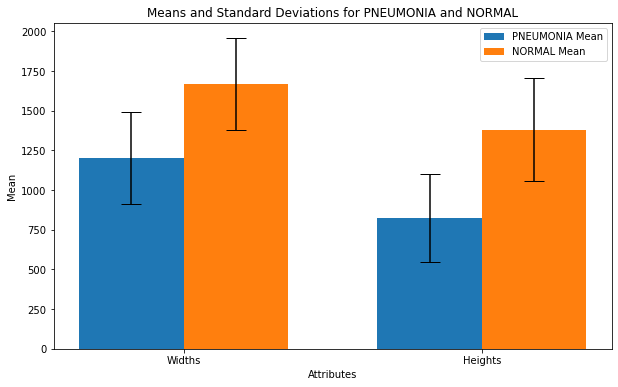

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Widths', 'Heights']
width = 0.35
x = range(len(labels))

ax.bar(x, pneumonia_mean, width, label='PNEUMONIA Mean', yerr=pneumonia_std, capsize=10)
ax.bar([i + width for i in x], normal_mean, width, label='NORMAL Mean', yerr=normal_std, capsize=10)

ax.set_xlabel('Attributes')
ax.set_ylabel('Mean')
ax.set_title('Means and Standard Deviations for PNEUMONIA and NORMAL')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

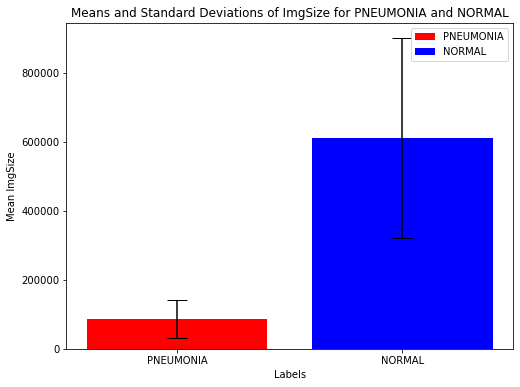

In [29]:
pneumonia_mean_imgsize = df[df['label'] == "PNEUMONIA"]['ImgSize'].mean()
pneumonia_std_imgsize = df[df['label'] == "PNEUMONIA"]['ImgSize'].std()

normal_mean_imgsize = df[df['label'] == "NORMAL"]['ImgSize'].mean()
normal_std_imgsize = df[df['label'] == "NORMAL"]['ImgSize'].std()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(0, pneumonia_mean_imgsize, yerr=pneumonia_std_imgsize, capsize=10, color='red', label='PNEUMONIA')
ax.bar(1, normal_mean_imgsize, yerr=normal_std_imgsize, capsize=10, color='blue', label='NORMAL')

ax.set_xlabel('Labels')
ax.set_ylabel('Mean ImgSize')
ax.set_title('Means and Standard Deviations of ImgSize for PNEUMONIA and NORMAL')
ax.set_xticks([0, 1])
ax.set_xticklabels(['PNEUMONIA', 'NORMAL'])
ax.legend()

plt.show()

# Plot PNEUMODIA IMAGES

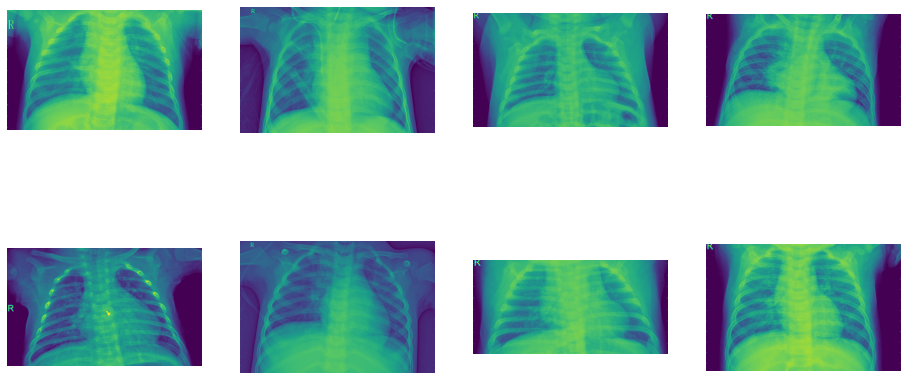

In [30]:

# Your code here for Exploratory Data Analysis (EDA)
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)
 
# Select the starting index for the images to display
pic_index = 210
 
# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
                    for fname in pneumonia_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
    sp = plt.subplot(2, 4, i+1)
    sp.axis('Off')
 
    # Read in the image using Matplotlib's imread() function
    img = mpimg.imread(img_path)
    plt.imshow(img)
 
# Display the plot with the 16 images in a 4x4
plt.show()

# Plot NORMAL IMAGES

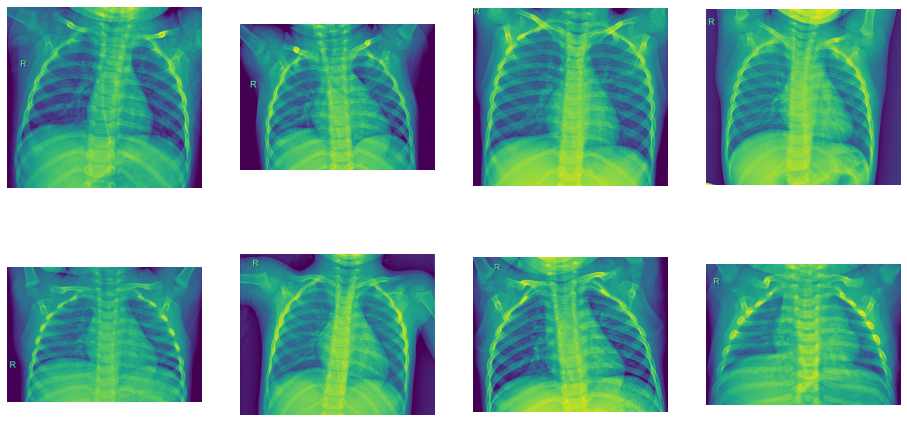

In [58]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()


## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


## Entrainer le Modèle sans regler le problème de Imbalance Data

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import Callback

# Chemins des données d'entraînement, de validation et de test
train_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\train\\'
valid_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\val\\'
test_path = 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\test\\'

# Créez des générateurs de données d'entraînement, de validation et de test
datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalisation des valeurs de pixels
batch_size = 32

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  # Pour un problème de classification binaire
)

valid_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# Créez votre modèle CNN personnalisé
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilez le modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînez le modèle
history = model.fit(train_generator, 
                    validation_data=valid_generator, 
                    epochs=7, 
                    steps_per_epoch=50,
                    validation_steps=len(valid_generator))

# Évaluez le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_accuracy}')
 


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/7
50/50 [==============================] - 99s 2s/step - loss: 0.7453 - accuracy: 0.7113 - val_loss: 0.5862 - val_accuracy: 0.6250
Epoch 2/7
50/50 [==============================] - 97s 2s/step - loss: 0.2067 - accuracy: 0.9144 - val_loss: 0.3264 - val_accuracy: 0.8125
Epoch 3/7
50/50 [==============================] - 91s 2s/step - loss: 0.1053 - accuracy: 0.9606 - val_loss: 0.3109 - val_accuracy: 0.8125
Epoch 4/7
50/50 [==============================] - 78s 2s/step - loss: 0.1157 - accuracy: 0.9625 - val_loss: 1.2144 - val_accuracy: 0.6250
Epoch 5/7
50/50 [==============================] - 76s 2s/step - loss: 0.1425 - accuracy: 0.9419 - val_loss: 0.2200 - val_accuracy: 0.8125
Epoch 6/7
50/50 [==============================] - 72s 1s/step - loss: 0.0975 - accuracy: 0.9675 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 7/7
20/20 [==========================

In [14]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict the labels for the test data
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(np.int)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", confusion_mat)


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\test\\PNEUMONIA\\person141_bacteria_670.jpeg'

## Entrainer le Modèle avec undersampling

In [13]:

def sous_echantillonnage(path,pourcentage):
    
    
    cont=0
    
        
    for image in os.listdir(path):
            
        cont=cont+1
        
    nombre_a_supprime=round(pourcentage*cont)
    
    
    cont=1 
    for image in os.listdir(path):
        
        filepath=os.path.join(path,image)
        os.remove(filepath)
        if(cont==nombre_a_supprime):
            break
        
        cont=cont+1
        

############################## appele du fontion #########################################

sous_echantillonnage(NORMAL_dir,0.4)

#########################################################################################

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'E:\\Mes dossiers\\M2 SID\\DataScience\\Datasets\\chest_xray\\train\\NORMAL'

## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [47]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [ ]:

# Your code here for Model Evaluation


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [ ]:

# Your code here for Model Deployment (Bonus)



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


